In [1]:
%pylab inline  
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('classic')

Populating the interactive namespace from numpy and matplotlib


In [2]:
!wget  -O 'end_seminar.xlsx' -q 'https://www.dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=0'

In [3]:
data = pd.read_excel('end_seminar.xlsx')

In [4]:
# 1. [0 баллов] Откройте файл с таблицей (не забудьте про её формат). Выведите последние 10 строк.
data1 = data.tail(10)
data1

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
351,2020-05-18 23:58:33.903,8fe79f84f36e3a5d2d6745621321302c,1016,NaN,NaN,Безопасность компьютерных систем,Высокопроизводительные вычисления,Сбор и обработка данных с помощью краудсорсинга,Конфликты и кооперация,Проектирование и разработка высоконагруженных ...,Символьные вычисления,Да,0.942029,174.0,DevOps,NaN
352,2020-05-18 23:59:20.831,f93afd8e92c336b471aa3bbbc579aefe,1298,NaN,NaN,Высокопроизводительные вычисления,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Методы сжатия и передачи медиаданных,Проектирование и разработка высоконагруженных ...,Конфликты и кооперация,Да,0.057971,175.0,DevOps,NaN
353,2020-05-18 23:59:28.998,9963fc00d9405a35b894cc04a7e19855,1135,NaN,NaN,Безопасность компьютерных систем,Высокопроизводительные вычисления,Безопасность компьютерных систем,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Символьные вычисления,Да,0.572464,175.0,DevOps,NaN
354,2020-05-19 08:55:39.509,98c5a2548d93f26bd4195466e93178b3,1035,NaN,NaN,Байесовские методы машинного обучения,Глубинное обучение в обработке звука,Statistical Learning Theory,Обучение с подкреплением,Генеративные модели в машинном обучении,Методы сжатия и передачи медиаданных,Нет,0.905797,171.0,DevOps,NaN
355,2020-05-19 18:58:06.283,ba298cbd9be59b84bab33325e956f27e,1155,NaN,NaN,Сбор и обработка данных с помощью краудсорсинга,Байесовские методы машинного обучения,Анализ неструктурированных данных,Конфликты и кооперация,Обучение с подкреплением,Компьютерное зрение,Да,0.507246,171.0,Соревновательный анализ данных,NaN
356,2020-05-19 19:04:17.873,c5870b37ee3f672e4259dfb2fc02ed8f,1029,NaN,NaN,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,Компьютерное зрение,Да,0.920290,174.0,DevOps,NaN
357,2020-05-19 20:19:25.815,f44aea1095f9f5b8e2f5f0ed2b17891b,1060,NaN,NaN,Анализ неструктурированных данных,Высокопроизводительные вычисления,Моделирование временных рядов,Конфликты и кооперация,Обучение с подкреплением,Численные методы,Да,0.840580,174.0,DevOps,NaN
358,2020-05-20 11:54:38.318,d7118b44c7e8fdbbaaca226d2da6fef1,1111,NaN,NaN,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Численные методы,Да,0.652174,173.0,Соревновательный анализ данных,NaN
359,2020-05-23 21:16:40.916,79d14db48e4737af731960ae212d5134,966,NaN,NaN,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,Да,0.985507,172.0,DevOps,NaN
360,2020-05-23 21:16:40.916,f2d210ace25a841e1e58036b257d5d47,1195,NaN,NaN,Анализ неструктурированных данных,Моделирование временных рядов,Высокопроизводительные вычисления,Обучение с подкреплением,Компьютерное зрение,Методы сжатия и передачи медиаданных,NaN,0.369565,176.0,Соревновательный анализ данных,NaN


In [5]:
# Сколько было заявок из групп 18-го года набора, а сколько из групп 17-го года?
data21 = data[data['18_group'] > 0]
len (data21)

223

In [6]:
data22 = data[data['17_group'] > 0]
len (data22)

138

In [7]:
# Есть ли студенты с равными перцентилями?
data23 = data.drop_duplicates(['percentile'])
not len(data23)
# дубликатов нет

False

In [8]:
# Есть ли в данных пропуски? В каких колонках? Сколько их в каждой из этих колонок?

In [9]:
# количество пустых по колонкам
data31 = data[data['18_group'].isnull()]
len (data31)

138

In [10]:
data32 = data[data['is_mi'].isnull()]
len (data32)

343

In [11]:
data33 = data[data['is_first_time'].isnull()]
len (data33)

2

In [12]:
data34 = data[data['17_group'].isnull()]
len (data34)

223

In [13]:
data35 = data[data['blended'].isnull()]
len (data35)

223

In [14]:
data36 = data[data['is_ml_student'].isnull()]
len (data36)

304

In [15]:
# всего пропусков
data.isnull().sum().sum()

1233

In [16]:
# Заполните пропуски пустой строкой для строковых колонок и нулём для числовых.
data37 = data
data37.is_ml_student = data37.is_ml_student.fillna('')
data37.blended = data37.blended.fillna('')
data37.is_first_time = data37.is_first_time.fillna('')
data37.is_mi = data37.is_mi.fillna('')
data37 = data37.fillna(0)
data37

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,698,181.0,,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.183857,0.0,,
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,647,181.0,,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,Нет,0.426009,0.0,,
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,624,185.0,,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Да,0.538117,0.0,,
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,579,182.0,,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.744395,0.0,,
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,572,183.0,,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Да,0.780269,0.0,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,2020-05-19 19:04:17.873,c5870b37ee3f672e4259dfb2fc02ed8f,1029,0.0,,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,Компьютерное зрение,Да,0.920290,174.0,DevOps,
357,2020-05-19 20:19:25.815,f44aea1095f9f5b8e2f5f0ed2b17891b,1060,0.0,,Анализ неструктурированных данных,Высокопроизводительные вычисления,Моделирование временных рядов,Конфликты и кооперация,Обучение с подкреплением,Численные методы,Да,0.840580,174.0,DevOps,
358,2020-05-20 11:54:38.318,d7118b44c7e8fdbbaaca226d2da6fef1,1111,0.0,,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Численные методы,Да,0.652174,173.0,Соревновательный анализ данных,
359,2020-05-23 21:16:40.916,79d14db48e4737af731960ae212d5134,966,0.0,,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,Да,0.985507,172.0,DevOps,


In [17]:
# Посмотрите повнимательнее на колонку 'is_first_time'.¶
# Есть ли в ней ответы "Нет"? Сколько их?
data4 = data37[data37['is_first_time'] == 'Нет']

# таблица без повторов
dataNew = data37.drop_duplicates(['id']) 

# Ответ: (кол-во повторных обращений)
len (data4)

51

In [18]:
# Какие blended-курсы для четверокурсников существуют? 
# На какой blended-курс записалось наибольшее количество студентов? 
# На каком из курсов собрались студенты с самым высоким средним рейтингом?

data.groupby(['blended'])['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
blended,,,,,,,,
,223.0,632.914798,67.465620,495.0,578.50,631.0,684.5,784.0
DevOps,91.0,1152.989011,93.702661,964.0,1085.00,1147.0,1219.5,1365.0
Введение в дифференциальную геометрию,15.0,1210.733333,94.808428,1085.0,1146.50,1201.0,1248.5,1457.0
Соревновательный анализ данных,32.0,1144.218750,77.916719,985.0,1098.75,1157.0,1192.0,1333.0


In [19]:
# Выясните, есть ли в данных студенты с абсолютно одинаковыми предпочтениями по всем курсам 
# (не забудьте учесть blended-курсы для четверокурсников). Сколько таких наборов, 
# которые взяли несколько студентов? Выведите их все вместе с количеством выбравших их студентов.

In [20]:
# аналог без циклов

used_features =[
"fall_1",
"fall_2",
"fall_3",
"spring_1",
"spring_2",
"spring_3",
"blended"
]

data['is_duplicated'] = data.duplicated(used_features)
#  число студентов у которых совпало
data['is_duplicated'].sum() 

18

In [21]:
# число уникальных подборок курсов
new = data[data['is_duplicated'] == True]
len(new.drop_duplicates(['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended']))

15

In [22]:
new.drop_duplicates(['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended'])

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student,is_duplicated
40,2020-05-17 00:54:43.939,d38ebd0ba564ea88de8015e116f811c8,546,187.0,,Безопасность компьютерных систем,Высокопроизводительные вычисления,Язык SQL,Компьютерные сети,Промышленное программирование на языке Java,Дискретная оптимизация,Да,0.883408,NaN,,,True
84,2020-05-18 17:22:56.786,bfe75c08c6b7e31d4e7d48c9c5fed69b,758,182.0,,Безопасность компьютерных систем,Statistical Learning Theory,Матричные вычисления,Дискретная оптимизация,Промышленное программирование на языке Java,Дополнительные главы прикладной статистики,Да,0.022422,NaN,,1,True
105,2020-05-18 19:25:39.947,5a6f07c1f6186408b43f0f8e729168e9,632,186.0,,Моделирование временных рядов,Сбор и обработка данных с помощью краудсорсинга,Безопасность компьютерных систем,Компьютерные сети,Дополнительные главы прикладной статистики,Системы баз данных,Да,0.493274,NaN,,1,True
110,2020-05-18 19:36:51.479,f5d9f99cb876ca0888d18b6e444fa1b1,516,187.0,,Сбор и обработка данных с помощью краудсорсинга,Язык SQL,Теория баз данных,Промышленное программирование на языке Java,Машинное обучение 2,Компьютерные сети,Нет,0.982063,NaN,,,True
133,2020-05-18 21:15:58.617,a6ce02b12540bca3cdd15757f8a2e919,597,185.0,,Безопасность компьютерных систем,Сбор и обработка данных с помощью краудсорсинга,Матричные вычисления,Компьютерные сети,Промышленное программирование на языке Java,Анализ данных в бизнесе,Да,0.663677,NaN,,,True
171,2020-05-18 22:32:20.002,851497aadac83e844753bb3b2163c79b,654,183.0,,Безопасность компьютерных систем,Высокопроизводительные вычисления,Язык SQL,Промышленное программирование на языке Java,Компьютерные сети,Системы баз данных,Да,0.394619,NaN,,,True
178,2020-05-18 22:56:27.522,6388c7920a7d454d2db81430f1f231c4,599,183.0,,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Промышленное программирование на языке Java,Компьютерные сети,Дискретная оптимизация,Да,0.654709,NaN,,,True
185,2020-05-18 23:11:05.179,813663487952e66e7c39d29b0931206d,585,183.0,,Язык SQL,Высокопроизводительные вычисления,Теория баз данных,Компьютерные сети,Промышленное программирование на языке Java,Дискретная оптимизация,Да,0.717489,NaN,,,True
218,2020-05-20 11:49:38.801,bd416140ecdb32b6dbd7f40820bf63b1,518,185.0,,Безопасность компьютерных систем,Теория баз данных,Язык SQL,Машинное обучение 2,Компьютерные сети,Промышленное программирование на языке Java,Да,0.977578,NaN,,,True
228,2020-05-14 21:10:58.417,8c3aa7371731bef999519c3de2c47423,1101,NaN,,Безопасность компьютерных систем,Высокопроизводительные вычисления,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Конфликты и кооперация,Да,0.695652,176.0,DevOps,,True


In [23]:
# Найдите курсы по выбору, на которые записывались как студенты 18-го года набора, так и студенты 17-го года.
used_features =[
"fall_1",
"fall_2",
"fall_3",
"spring_1",
"spring_2",
"spring_3"
]


new1 = data[data['17_group'] > 0]
new2 = data[data['18_group'] > 0]

a = set(np.unique(new1[used_features]))
b = set(np.unique(new2[used_features]))
a & b

{'Statistical Learning Theory',
 'Безопасность компьютерных систем',
 'Высокопроизводительные вычисления',
 'Моделирование временных рядов',
 'Принятие решений в условиях риска и неопределённости',
 'Сбор и обработка данных с помощью краудсорсинга',
 'Численные методы'}

In [25]:
a - b

{'Анализ неструктурированных данных',
 'Байесовские методы машинного обучения',
 'Генеративные модели в машинном обучении',
 'Глубинное обучение в обработке звука',
 'Компьютерное зрение',
 'Конфликты и кооперация',
 'Методы сжатия и передачи медиаданных',
 'Обучение с подкреплением',
 'Проектирование и разработка высоконагруженных сервисов',
 'Символьные вычисления'}

In [26]:
b - a

{'Анализ данных в бизнесе',
 'Дискретная оптимизация',
 'Дополнительные главы прикладной статистики',
 'Компьютерные сети',
 'Матричные вычисления',
 'Машинное обучение 2',
 'Промышленное программирование на языке Java',
 'Системы баз данных',
 'Теория баз данных',
 'Язык SQL'}

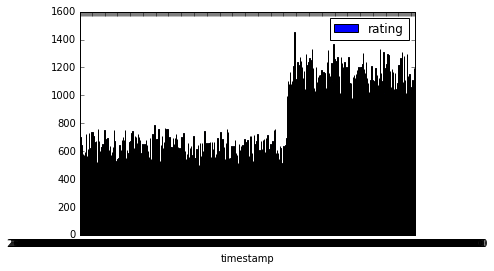

In [28]:
# Постройте график средних рейтингов по дням получения ответов (bar plot).
ax = data.plot.bar(x = 'timestamp', y = 'rating', rot = 0)

plt.show()

In [29]:
# Проверка 0
assert dataNew.shape[0] == 347, 'В таблице остались повторы или потеряны данные'

assert dataNew.isna().sum().sum() == 0, 'В таблице остались пропуски'

In [31]:
# Создайте новый признак, обозначающий, сколько осенних курсов должен выбрать студент

dataNew['num_of_courses_fall'] = 1

dataNew.loc[(dataNew['17_group'] == 171), 'num_of_courses_fall'] = 2
dataNew.loc[(dataNew['17_group'] == 172), 'num_of_courses_fall'] = 2
dataNew.loc[(dataNew['17_group'] == 173), 'num_of_courses_fall'] = 2
dataNew.loc[(dataNew['18_group'] == 188), 'num_of_courses_fall'] = 2

dataNew

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student,num_of_courses_fall
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,698,181.0,,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.183857,0.0,,,1
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,647,181.0,,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,Нет,0.426009,0.0,,,1
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,624,185.0,,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Да,0.538117,0.0,,,1
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,579,182.0,,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.744395,0.0,,,1
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,572,183.0,,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Да,0.780269,0.0,,,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,2020-05-19 19:04:17.873,c5870b37ee3f672e4259dfb2fc02ed8f,1029,0.0,,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,Компьютерное зрение,Да,0.920290,174.0,DevOps,,1
357,2020-05-19 20:19:25.815,f44aea1095f9f5b8e2f5f0ed2b17891b,1060,0.0,,Анализ неструктурированных данных,Высокопроизводительные вычисления,Моделирование временных рядов,Конфликты и кооперация,Обучение с подкреплением,Численные методы,Да,0.840580,174.0,DevOps,,1
358,2020-05-20 11:54:38.318,d7118b44c7e8fdbbaaca226d2da6fef1,1111,0.0,,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Численные методы,Да,0.652174,173.0,Соревновательный анализ данных,,2
359,2020-05-23 21:16:40.916,79d14db48e4737af731960ae212d5134,966,0.0,,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,Да,0.985507,172.0,DevOps,,2


In [33]:
# Проверка
col_name = 'num_of_courses_fall'

assert(dataNew[dataNew['id'] == '2662600c2c37e11e62f6ee0b88452f22'][col_name] == 1).all()
assert(dataNew[dataNew['id'] == 'd555d2805e1d93d4f023e57dc4c8f403'][col_name] == 2).all()
assert(dataNew[dataNew['id'] == '8fe79f84f36e3a5d2d6745621321302c'][col_name] == 1).all()
assert(dataNew[dataNew['id'] == 'e4caca755ee0bdd711e18fb8084958b5'][col_name] == 1).all()